# Hydrometrics

In this notebook, we show how to compute several **hydrometics parameters** based on stream network produced from  model. The analysis relies on the `flow` files (*i.e.* stream) found in Badlands outputs. If you are interested in looking at morphometrics and stratigraphic analysis there are other notebooks specially designed for that in the **Badlands companion** repository.

**Hydrometrics** here refers only to quantitative description and analysis of water surface and we don't consider groundwater analysis. We will show how you can extract a particular catchment from a given model and compute for this particular catchment a series of paramters such as:

- **river profile** evolution based on main stream elevation and distance to outlet,
- **peclet number** distribution which evaluates the dominant processes shaping the landscape,
- $\chi$ **parameter** that characterizes rivers system evolution based on terrain steepness and the arrangement of tributaries,
- **discharge** profiles 
- **glacier ice and flow path** profiles

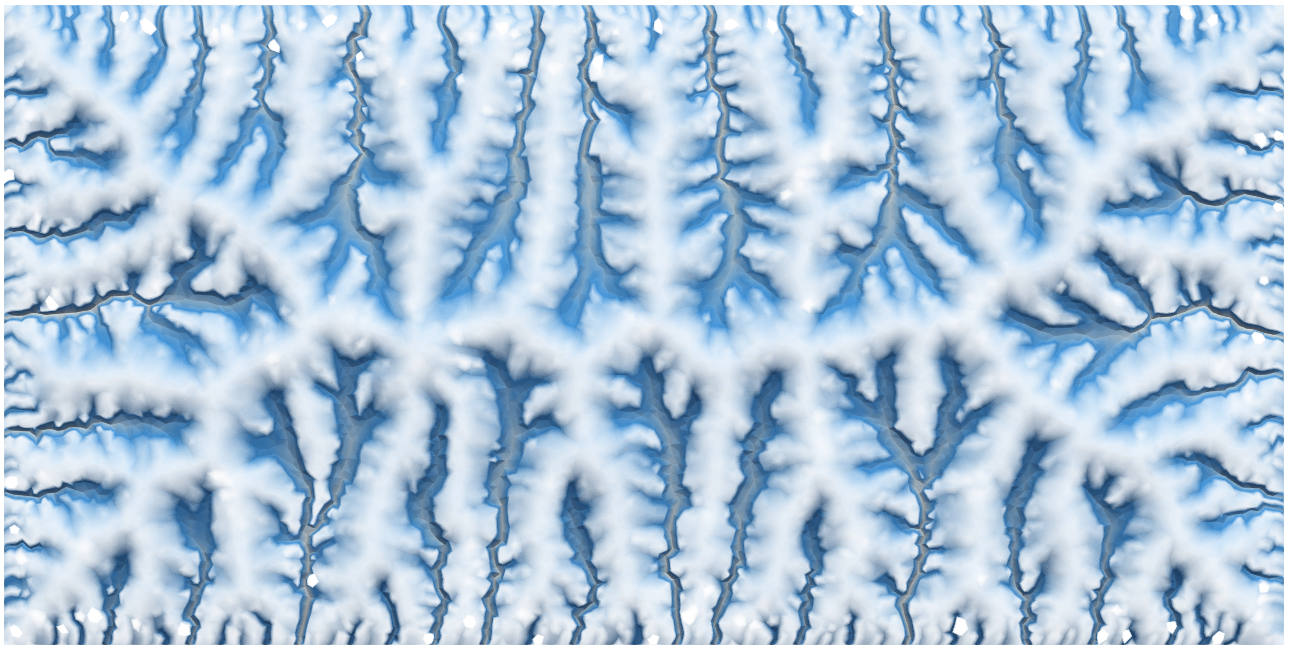

In [ ]:
%matplotlib inline

#Plotting feature
from matplotlib import cm

# Import badlands hydrology grid generation toolbox
from scripts import hydroGrid as hydr

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

#Data handling helper
import numpy

# Import badlands morphology grid generation toolbox
from scripts import morphoGrid as morph

from matplotlib import pyplot as plt

# 1. Load catchments parameters

We first have to define the path to the Badlands outputs we want to analyse.

We then need to provide a point coordinates (X,Y) contained in the catchment of interest. This point doesn't need to be the outlet of the catchment. 

For more information regarding the function uncomment the following line.

In [ ]:
#help(hydr.hydroGrid.__init__)


We will start by using some of the morphology plotting features to help find the coordinates you will input into the hydrometric algorithms further below


In [ ]:
morpho = morph.morphoGrid(folder='output_glacier_2/h5', bbox = [0,0,60000,40000], dx=50)

In [ ]:
morpho.loadHDF5(timestep=20)

In [ ]:
yaxis, xaxis = morpho.z.shape

#Input the coordinates to check location
point_y_axis = 25000
point_x_axis = 20000

#Maximum X and Y coordinate value given in the bbox
y_size = 60000
x_size = 40000

#Calcs
y = yaxis * (point_y_axis/y_size)
x = xaxis * (point_x_axis/x_size)

# Show the plot
plt.imshow(morpho.z, cmap='viridis')
plt.scatter(x, y, color='red', s=10, marker='o', label='Catchment Point')
plt.show()

In [ ]:
hydro1 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [25000,20000])
hydro2 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [35000,15000])

# 2. Extract particular catchment dataset

We now extract the data from a particular time step (`timestep`) and for the catchment of interest, which contained the point specified in previous function.

**Note**

If you are interested in making some hydrometric comparisons between different time steps you can create multiple instances of the hydrometrics python class each of them associated to a given time step.

In [ ]:
#help(hydro.getCatchment)

In [ ]:
hydro1.getCatchment(timestep=20)
hydro2.getCatchment(timestep=20)

We can visualise the stream network using the `viewNetwork` function. The following paramters can be displayed:
- $\chi$ paramater 'chi',
- elevation 'Z',
- discharge 'FA' (logarithmic values)

In [ ]:
#help(hydro.viewNetwork)

In [ ]:
hydro1.viewNetwork(markerPlot = False, linePlot = True, lineWidth = 2, markerSize = 15, 
                 val = 'chi', width = 500, height = 700, colorMap = cm.viridis, 
                 colorScale = 'Viridis', title = 'Stream network graph 1')

hydro2.viewNetwork(markerPlot = False, linePlot = True, lineWidth = 2, markerSize = 15, 
                  val = 'chi', width = 500, height = 700, colorMap = cm.viridis, 
                  colorScale = 'Viridis', title = 'Stream network graph 2')

In [ ]:
hydro1.viewNetwork(markerPlot = True, linePlot = True, lineWidth = 3, markerSize = 3, 
                 val = 'FA', width = 500, height = 700, colorMap = cm.Blues, 
                 colorScale = 'Blues', title = 'Stream network graph 1')

hydro2.viewNetwork(markerPlot = True, linePlot = True, lineWidth = 3, markerSize = 3, 
                  val = 'FA', width = 500, height = 700, colorMap = cm.Blues, 
                  colorScale = 'Blues', title = '<br>Stream network graph 2')

# 3. Extract catchment main stream

We now extract the main stream for the considered catchment based on flow 
discharge values.

In [ ]:
#help(hydro.extractMainstream)

In [ ]:
hydro1.extractMainstream()
hydro2.extractMainstream()

As for the global stream network, you can use the `viewStream` function to visualise the main stream dataset.

In [ ]:
#help(hydro.viewStream)

In [ ]:
hydro1.viewStream(linePlot = False, lineWidth = 1, markerSize = 7, 
                 val = 'Z', width = 500, height = 700, colorMap = cm.jet, 
                 colorScale = 'Jet', title = 'Stream network graph 1')

hydro2.viewStream(linePlot = True, lineWidth = 1, markerSize = 7, 
                  val = 'Z', width = 500, height = 700, colorMap = cm.jet, 
                  colorScale = 'Jet', title = 'Stream network graph 2')

# 4. Compute main stream hydrometrics

Here, we compute the stream parameters using the distance from outlet and the Badlands simulation coefficients for the **stream power law** and the **hillslope linear diffusion**.

The formulation for the Peclet number is: 

$$Pe =\frac {\kappa_{c}l^{2(m+1)-n}}{\kappa_{d}z^{1-n}}$$

where $\kappa_{c}$ is the erodibility coefficient, $\kappa_{d}$ the hillslope diffusion coefficient and *m*, *n* the exponents from the stream power law equation. Their values are defined in your model input file.

The formulation for the $\chi$ parameter follows:

$$\chi = \int_{x_b}^x \left( \frac{A_o}{A(x')} \right)^{m/n} dx' $$

where $A_o$ is an arbitrary scaling area, and the integration is performed upstream from base level to location $x$.
         
In addition the function `computeParams` requires an additional parameter `num` which is the number of samples to generate along the main stream profile for linear interpolation.

In [ ]:
hydro1.computeParams(kd=8.e-1, kc=5.e-6, m=0.5, n=1., num=100)
hydro2.computeParams(kd=8.e-1, kc=5.e-6, m=0.5, n=1., num=100)

The following combination of parameters can be visualised with the `viewPlot` function:
- 'dist': distance from catchment outlet
- 'FA': flow discharge (logorithmic)
- 'Pe': Peclet number
- 'Chi': $\chi$ parameter
- 'Z': elevation from outlet.

In [ ]:
#help(hydro1.viewPlot)

In [ ]:
hydro1.viewPlot(lineWidth = 3, markerSize = 5, xval = 'dist', yval = 'Z',
               width = 800, height = 500, colorLine = 'black', colorMarker = 'black',
               opacity = 0.2, title = 'Chi vs distance to outlet')
# hydro2.viewPlot(lineWidth = 3, markerSize = 5, xval = 'dist', yval = 'Z',
#                width = 800, height = 500, colorLine = 'orange', colorMarker = 'purple',
#                opacity = 0.2, title = 'Chi vs distance to outlet')

# 5. River profile through time

Using the same functions as before we can now create the river profile evolution through time and plot it on a single graph.

In [ ]:
#help(hydro.timeProfiles)

In [ ]:
hydro0 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [40599,7656.65])

timeStp = [2,4,6,8,10,12,14,16,18,20]
timeMA = map(lambda x: x * 0.25, timeStp)
print('Profile time in Ma:',list(timeMA))
dist = []
elev = []
for t in range(len(timeStp)):
    hydro0.getCatchment(timestep=timeStp[t])
    hydro0.extractMainstream()
    hydro0.computeParams(kd=8.e-1, kc=5.e-6, m=0.5, n=1., num=1000)
    dist.append(hydro0.dist)
    elev.append(hydro0.Zdata)

hydro0.timeProfiles(pData = elev, pDist = dist, width = 1000, height = 600, linesize = 3,
                    title = 'River profile through time')

In [ ]:
hydro00 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [33627.6,30672.9])

timeStp = [2,4,6,8,10,12,14,16,18,20]
timeMA = map(lambda x: x * 0.25, timeStp)
print('Profile time in Ma:',list(timeMA))
dist = []
elev = []
for t in range(len(timeStp)):
    hydro00.getCatchment(timestep=timeStp[t])
    hydro00.extractMainstream()
    hydro00.computeParams(kd=8.e-1, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydro00.dist)
    elev.append(hydro00.Zdata)
    
hydro00.timeProfiles(pData = elev, pDist = dist, width = 1000, height = 600, linesize = 3,
                    title = 'River profile through time')

# Glacier Hydrometrics / Morphometrics 

Here we use specific additions to the hydrometric analysis toolbox provided in the scripts folder to analyze the glacial ice and flow path profiles:
- **glacier ice shape profile** to see the effect of slope and accumulation on ice through time and
- **development of glacial profile and flow path** to include the underlying morphology and
- **comparison tool for plotting seperate models** to plot 3 (or more) seperate catchments or models

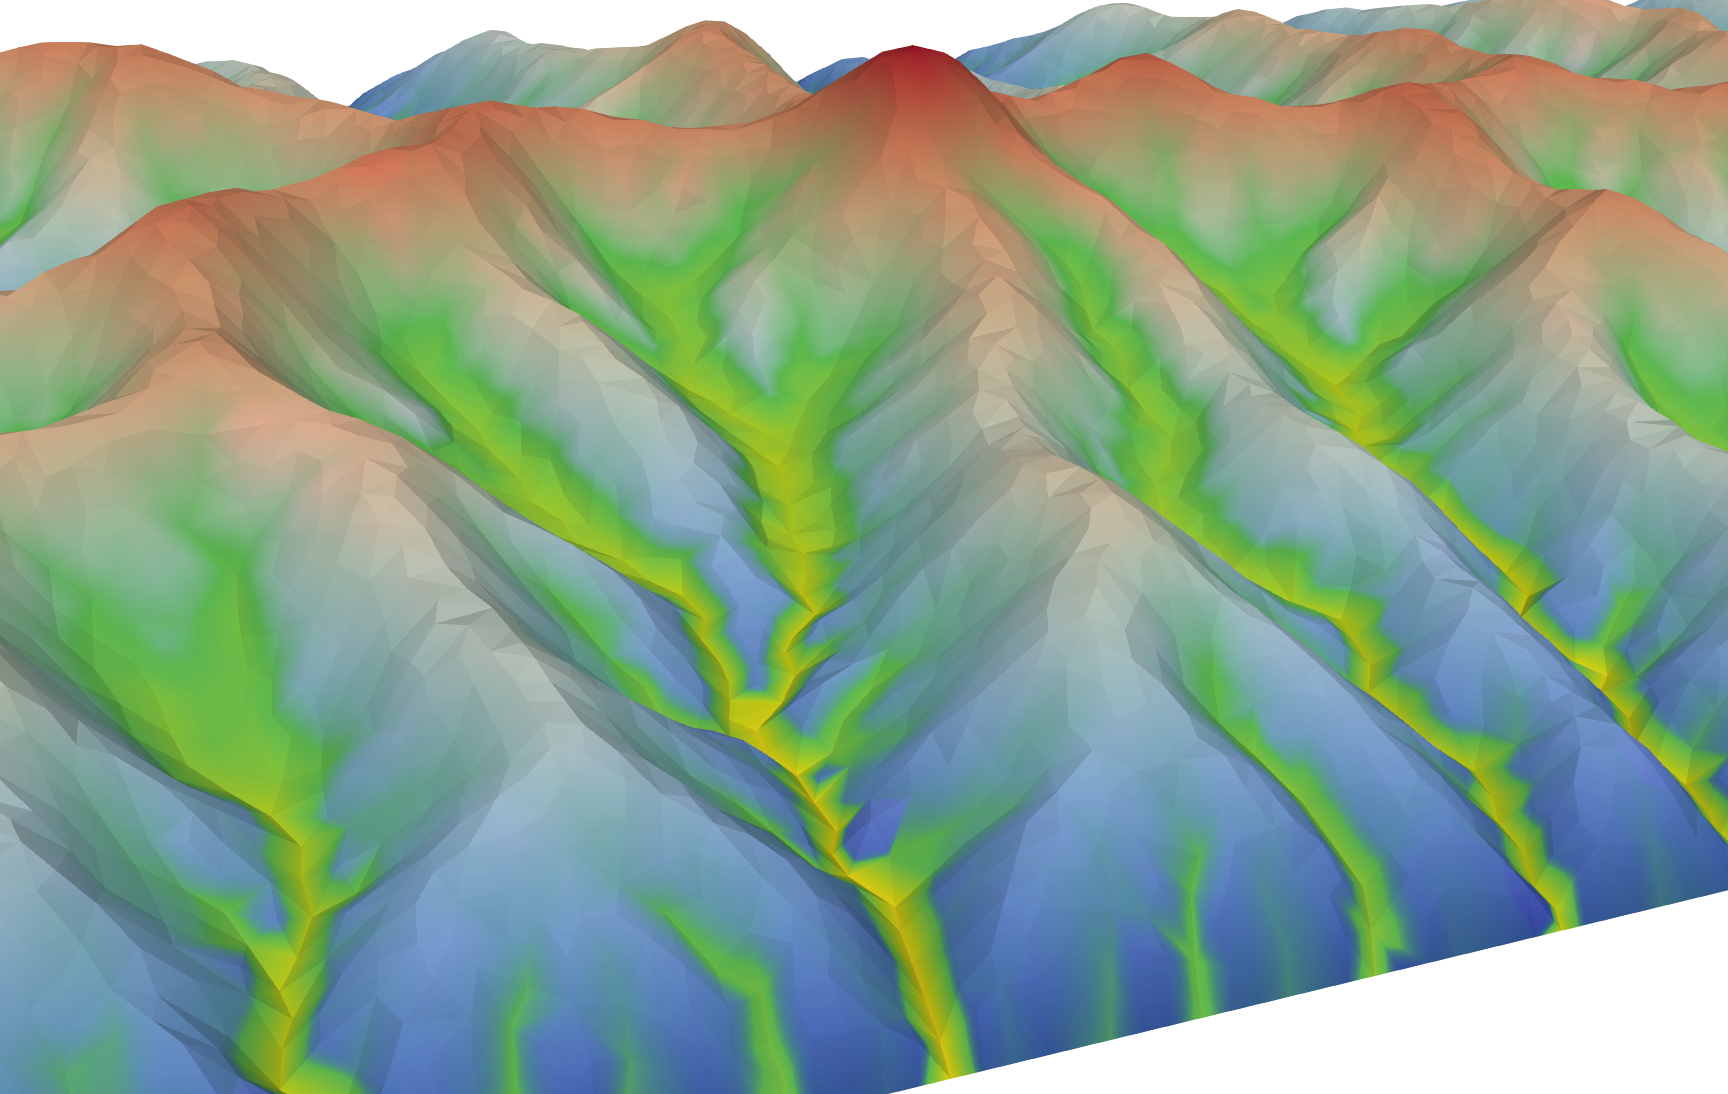


# 6. Ice Profile Through Time


In [ ]:
#Ice Profile

hydro00 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [40000,13500])
                              
timeStp = [1, 5, 10, 15, 20]
timeMA = map(lambda x: x, timeStp)
print('Profile time in Ma:',list(timeMA))
dist = []
elev = []
iceTH = []
for t in range(len(timeStp)):
    hydro00.getCatchment(timestep=timeStp[t])
    hydro00.extractMainstream()
    hydro00.computeParams(kd=2.5e-5, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydro00.dist)
    elev.append(hydro00.Zdata)
    iceTH.append(hydro00.IceData)
    
    #Lelev = hydro00.Zdata
    #LiceTH = hydro00.IceData
    #elev.append(Lelev + LiceTH)
    
hydro00.timeProfiles(pData = iceTH, pDist = dist, width = 1000, height = 600, linesize = 3,
                    title = 'Glacier Ice Height through time')

# 7. Glacial Flow Path through time

In [ ]:
hydro00 = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [40000,13500])
                              
timeStp = [1, 5, 10]
timeMA = map(lambda x: x, timeStp)
print('Profile time in Ma:',list(timeMA))
dist = []
elev = []
iceTH = []
for t in range(len(timeStp)):
    hydro00.getCatchment(timestep=timeStp[t])
    hydro00.extractMainstream()
    hydro00.computeParams(kd=2.5e-5, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydro00.dist)
    elev.append(hydro00.Zdata)
    iceTH.append(hydro00.IceData)
    
hydro00.GlacProfiles(pData = elev, pDist = dist, pIce = iceTH, width = 1000, height = 600, linesize = 3,
                    title = 'Glacier profile through time - Oscillating Elevation 10')

# 8. Comparison of catchments or models

In [ ]:
hydroA = hydr.hydroGrid(folder='output_glacier_2/h5', ptXY = [40000,13500])
hydroB = hydr.hydroGrid(folder='output_icecap/h5', ptXY = [40000,13500])
hydroC = hydr.hydroGrid(folder='output_fluvial_1/h5', ptXY = [40000,13500])


timeStp = [20]
timeMA = map(lambda x: x, timeStp)
print('Profile time in Ma:',list(timeMA))
dist = []
elev = []
iceTH = []

for t in range(len(timeStp)):
    hydroA.getCatchment(timestep=timeStp[t])
    hydroA.extractMainstream()
    hydroA.computeParams(kd=2.5e-5, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydroA.dist)
    elev.append(hydroA.Zdata)
    iceTH.append(hydroA.IceData)
    
    hydroB.getCatchment(timestep=timeStp[t])
    hydroB.extractMainstream()
    hydroB.computeParams(kd=2.5e-5, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydroB.dist)
    elev.append(hydroB.Zdata)
    iceTH.append(hydroB.IceData)
    
    hydroC.getCatchment(timestep=timeStp[t])
    hydroC.extractMainstream()
    hydroC.computeParams(kd=2.5e-5, kc=5.e-6, m=0.5, n=1., num=50)
    dist.append(hydroC.dist)
    elev.append(hydroC.Zdata)
    iceTH.append(hydroC.IceData)
    
hydro00.GlacProfiles(pData = elev, pDist = dist, pIce = iceTH, width = 1000, height = 600, linesize = 3,
                    title = 'Comparison of Glacier profiles')